# Modelització
## Anàlisis d'incerteses

- **Experimentació**
- **Errors i incerteses**
- **Nivell de confiança**

- Un cop hem resolt el nostre model hem de contrastar-lo amb la realitat
- L'anàlisi del model ens ha de servir per identificar quines són les dades rellevants
- Les dades provenen de mesures de magnituds físiques, enquestes o altres anàlisis

In [1]:
import numpy as np
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt

## Experimentació
- Les dades experimentals poden ser útils a diferents etapes del cicle de modelització
- Són necessàries per refutar el nostre model, calibrar-lo i verificar-lo

### Mètode científic
- Observació d'un fenomen
- Formulació d'una hipòtesi
- Disseny d'un experiment
- Refutació de la hipòtesi
- Formulació de la llei

### L'experiment
- Disseny
    - Estudiar que, com i quantes mesures necessitem per obtenir certa precisió
- Execució
    - Construcció, calibrat i mesura
- Anàlisi de dades
    - Obtenció de la mesura i estimació de la incertesa (amb cert nivell de confiança)    

**Resolució**: Diferencia entre dos punts distingibles d'un sistema de mesura

**Precisió**: Correspondència amb exactitud del resultat de la mesura amb el seu valor real. 

**Error**: Distribució aleatòria dels punts mesurats al voltant del valor de la mesura

## Errors i incerteses
- Els mètodes de mesura són imperfectes
- Sempre hi ha soroll o altres factors desconeguts que limiten la resolució de la mesura
- Les incerteses de les mesures limitaran la precisió del nostre model
- A partir de les incerteses de les mesures directes avaluarem la incertesa de la mesura indirecta

- Tindrem diferents fonts d'incerteses
    - Els valors de les mesures tindran errors
    - Els paràmetres del model també tindran errors
    - Els càlculs tindran certa resolució numèrica

In [2]:
data = pd.read_csv("../data/err.csv")[4:10]

x = data['x'].to_numpy()
y = data['y'].to_numpy()
yerr = data['yerr'].to_numpy()

line = lambda x, *p: p[0] + p[1] * x
pline, covline = optimize.curve_fit(line, x, y, [0, -1], sigma=yerr)

log = lambda x, *p: p[0] + p[1] * np.log(x)
plog, covlog = optimize.curve_fit(log, x, y, [0, 1], sigma=yerr)

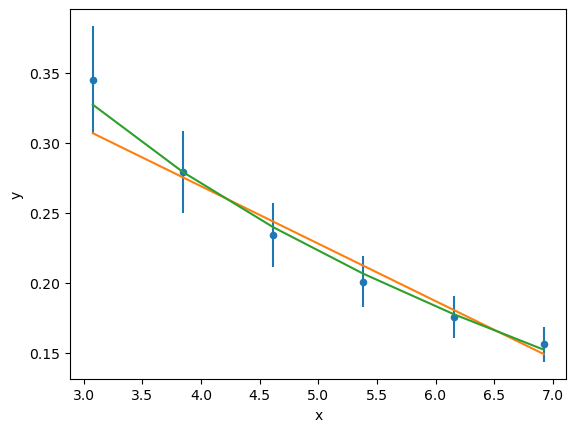

In [3]:
data.plot(kind='scatter', x='x', y='y', yerr='yerr')
l = plt.plot(x, line(x, *pline), x, log(x, *plog))

### Errors
- En qualsevol mesura podem tindre factors desconeguts que faran que el valor mesurat sigui diferent del valor real

$$X_i = X_{real\,i} + \delta_{1i} + \delta_{2i} + \delta_{3i}$$


- Per evitar confusions anomenaré:
    - errors: Valor desconeguts que pertorben la mesura del valor real ($\delta \, \beta \, \epsilon$)
    - incerteses: Estimació dels errors d'una mesura (u, b, s)

- Exemples amb diferents elements de mesura

- El valor mesurat el representarem

$$ X = X_{mesurat} \pm u_x$$

- $u_x$ és el rang d'incertesa dins del que estimem que es troben els errors estadístics i sistemàtics

- **Error estadístic**: Aquell que varia durant el procés de mesura

- De N mesures podem obtenir:

$$
\begin{align}
\bar{X} & = \frac{1}{N}\sum_{i=1}^N X_i \\
s_X & = \left[ \frac{1}{N-1}\sum_{i=0}^N \left(X_i - \bar{X} \right)^2 \right]^{1/2}
\end{align}
$$

- **Error sistemàtic**: aquell que no varia durant el procés de mesura
    - Donada una configuració del sistema de mesura, l'error no varia.

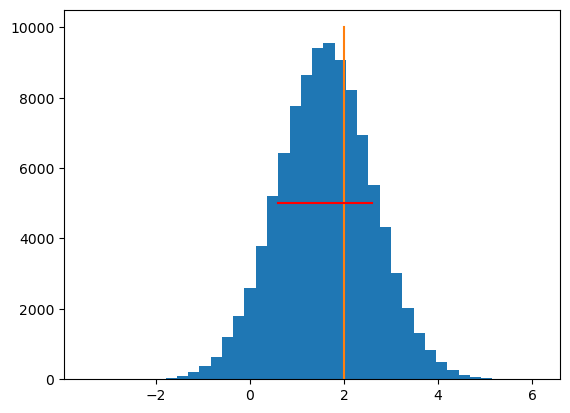

In [4]:
x = np.random.normal(np.zeros(100000) + 1.6)
plt.hist(x, bins=40)
l = plt.plot([2, 2], [0, 10000], [0.6, 2.6], [5000, 5000], "r")

- La incertesa estadística la podem avaluar a partir desviació estàndard de la mesura
- La incertesa sistemàtica és més complexa d'estimar:
    - Es pot estimar al procés de calibració
    - Combinant diferents sistemes de mesura
    - Analitzant el comportament del sistema de mesura

- Exemple d'estimació d'incerteses sistemàtiques:
    - calibració d'un termoparell
    - estudi de la corba de vàries mesures

- A banda de les incerteses del sistema de mesura en podem trobar d'altres:
    - Mesures temporals
        - El procés de mesura requereix un temps on el sistema pot fluctuar
    - Mesures mostra a mostra
        - Les mostres mesurades no són idèntiques i la variabilitat de les mostres introdueixen una incertesa en la caracterització del conjunt
    - Mesures efímeres
        - Són experiments que es poden fer un sol cop o cada experiment no es pot reproduir en les mateixes condicions

### Propagació d'errors
- Per mesurar alguns paràmetres ho farem de manera indirecta
- Combinarem la mesura de diferents mesures directes
- A la mesura combinada li asignarem una incertesa estàndard combinada $u_c$

- A partir de mesures directes de variables $x_i$
- podem mesurar indirectament una altra variable mitjançant una funció de reducció de dades 
$$r = r(x_i)$$

- Exemple de mesures de superfície o la densitat d'un gas $\rho = P/RT$

- Podem optar per dues estratègies
    - Mètode de Monte Carlo
    - Mètode de sèries de Taylor

#### Monte Carlo:
    - Assignem distribucions a cada incertesa (sistemàtica o estadística)
    - Calculem $r$ assignant valors aleatoris amb les distribucions assignades
    - Extraem $u_c$ de les distribucions de valors obtinguts
    $$X_i = X_{real\,i} + \epsilon_{Xi} + \beta_{1i} + \beta_{2i}$$

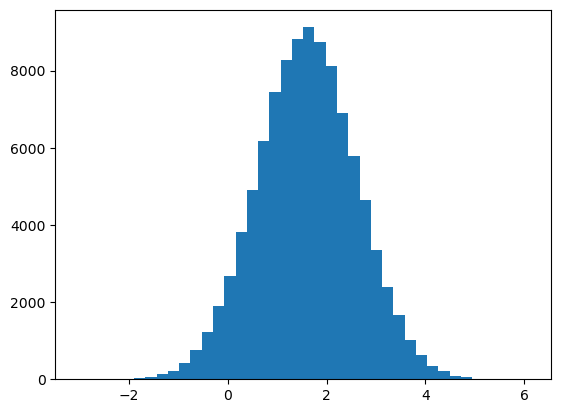

In [5]:
x = np.random.normal(np.zeros(100000) + 1.6)
l = plt.hist(x, bins=40)

#### Sèries de Taylor
- Sigui:
    - $r = r(x, y)$ una funció continua amb derivades contínues en el domini d'interès
    - $(x_k, y_k)$ el set de mesures $k$ per determinar $r_k$
    - $\beta_{xk}$ i $\epsilon_{xk}$ els errors sistemàtics i estadístics de la mesura $k$ de $x$
    - $x_{real}$ i $y_{real}$ són els valors reals desconeguts
    
$$
\begin{align}
x_k & = x_{real} + \beta_{xk} + \epsilon_{xk} \\
y_k & = y_{real} + \beta_{yk} + \epsilon_{yk}
\end{align}
$$

- Expandint $r$ en series de Taylor obtenim:
$$r_k = r_{real} + \frac{\partial r}{\partial x}(x_k - x_{real}) 
        + \frac{\partial r}{\partial y}(y_k - y_{real})
        + R_2$$
        
- Com $(x_{real}, y_{real})$ són desconegudes les aproximem avaluant-les a $(x_k, y_k)$
- Sent $R_2$ la resta de termes de derivades segones i superiors

$R_2 = \frac{1}{!2} \left[
        \frac{\partial^2 r}{\partial x^2}(x_k - x_{real})^2 
        + 2\frac{\partial^2 r}{\partial x \partial y}(x_k - x_{real})(y_k - y_{real})
        + \frac{\partial^2 r}{\partial y^2}(y_k - y_{real})^2 
        \right]$
- Aquest terme serà negligible si:
    - les derivades avaluades entre $(x_{real}, y_{real})$ i $(x_k, y_k)$ són d'una magnitud raonable
    - els errors de $x$ i $y$ són petits

- Sigui:
    - $\delta_{r_k}$ l'error total de $r$ a la mesura $k$
    - $\theta_x = \frac{\partial r}{\partial x}$ i $\theta_y = 
      \frac{\partial r}{\partial y}$

$$\delta_{r_k} = \theta_x (\beta_{xk} + \epsilon_{xk})
               + \theta_y (\beta_{yk} + \epsilon_{yk})$$


- Del conjunt de mesures obtindrem:

$$
\begin{align}
\sigma_{\delta_r} & = \lim(N \rightarrow \infty) 
                    \left[ \frac{1}{N} \sum^N_{k=1}(\delta_{r_k})^2\right] \\
                  & = \theta_x^2 \sigma_{\beta_x}^2
                    + 2\theta_x \theta_y \sigma_{\beta_x \beta_y}
                    + \theta_y^2 \sigma_{\beta_y}^2
                    + \theta_x^2 \sigma_{\epsilon_x}^2
                    + 2\theta_x \theta_y \sigma_{\epsilon_x \epsilon_y}
                    + \theta_y^2 \sigma_{\epsilon_y}^2
\end{align}
$$
                    
*(Assumint que no hi ha correlacions entre error sistemàtics i estadístics)*

- Sigui:
    - $u_c^2$ l'estimació de la variància de la distribució d'errors totals
    - $b^2$ l'estimació de la variància de la distribució d'errors sistemàtics
    - $s^2$ l'estimació de la variància de la distribució d'errors estadístics
    - $b_{xy}$ l'estimació de la covariància de la distribució d'errors sistemàtics
    - $s_{xy}$ l'estimació de la covariància de la distribució d'errors estadístics
    
$$ u_c^2 = \theta_x^2 b_x^2 + 2\theta_x \theta_y b_{xy} + \theta_y^2 b_y^2
       + \theta_x^2 s_x^2 + 2\theta_x \theta_y s_{xy} + \theta_y^2 s_y^2$$

- Per al cas general per $r = r(x_i)$
    
$$ u_c^2 = \sum_{i=1}^J \theta_i^2 b_i^2
       + \sum_{i=1}^{J-1}\sum_{k=i+1}^J 2\theta_i \theta_i b_{ik}
       + \sum_{i=1}^J \theta_i^2 s_i^2
       + \sum_{i=1}^{J-1}\sum_{k=i+1}^J 2\theta_i \theta_k s_{ik}$$

$$
\begin{align}
b_r^2 & = \sum_{i=1}^J \theta_i^2 b_i^2
       + \sum_{i=1}^{J-1}\sum_{k=i+1}^J 2\theta_i \theta_i b_{ik} \\
s_r^2 & = \sum_{i=1}^J \theta_i^2 s_i^2
       + \sum_{i=1}^{J-1}\sum_{k=i+1}^J 2\theta_i \theta_k s_{ik} \\  
       \\
u_r^2 & = (b_r^2 + s_r^2) \\
\end{align}
$$

## Nivell de confiança
- Alguns models necessiten un resultat amb cert nivell de confiança
- El valor real ha d'estar dins de la incertesa amb cert nivell de confiança
- Ens cal estimar la distribució d’incertesa combinada

- El mètode de Monte Carlo ens pot donar la distribució $u_r$
    - Podem definir l'interval de cobertura on trobarem cert percentatge de nivell de confiança

- Amb el mètode de sèries de Taylor hem d'assumir una distribució de la incertesa combinada
- Si tenim suficients dades podem assumir una distribució normal de $r$
- Fent servir t-test podem obtenir la incertesa $U_r$ com:
$$U_r^2 = t^2 u_c^2 $$

- Al cas pràctic general, a partir de $N>9$, podem considerar $t=2$ per un $95\%$ C.L. 

- En cas contrari, podem valorar els graus de llibertat $\nu_r$ a partir de l'aproximació de Welch–Satterthwaite
    - estimant els graus de llibertat $\nu_{s_i}$ i $\nu_{b_i}$
$$
\begin{align}
\nu_{s_i} & = N_i -1 \\
\nu_{b_i} & \approx \frac{1}{2} \left( \frac{\Delta b_i}{b_i} \right)^{-2}
\end{align}
$$

- Amb l'assumpció de mostres grans:
$$
\begin{align}
U_r^2 & = t^2 u_c^2 \\
      & = 2^2 (b_r^2 + s_r^2) \\
\end{align}
$$


- En el cas que les covariàncies siguin zero, podem simplificar a:
$$U_r^2 = \sum_{i=1}^J \theta_i^2 U_i^2$$

## Anàlisi d'incerteses
- Per planificar el nostre experiment i la verificació del model haurem d'avaluar la incertesa combinada del nostre resultat
- Farem estudi de les incerteses relatives i com afecten la incertesa relativa combinada
- Aquesta anàlisi ens permet identificar com afecta cada variable a la incertesa de la nostra mesura

- Expressant la incertesa combinada com:

$$ u_c^2 = \sum_{i=1}^J \theta_i^2 u_i^2
       + \sum_{i=1}^{J-1}\sum_{k=i+1}^J 2\theta_i \theta_i u_{ik}$$

- Assumint en primera aproximació incerteses independents
$$ u_c^2 = \sum_{i=1}^J \theta_i^2 u_i^2$$



- Si ho expressen com incerteses relatives tindrem:
$$
\begin{align}
\left( \frac{u_c}{r}^2 \right) & = \sum_{i=1}^J \theta_i^2 \left( \frac{x_i}{r} \right)^2 
                                                           \left( \frac{u_i}{x_i} \right)^2 \\
                & = \sum_{i=1}^J \left( \frac{x_i}{r} \frac{\partial r}{\partial x_i}\right)^2 
                                 \left( \frac{u_i}{x_i} \right)^2 \\
\end{align}
$$

- On tindrem els coeficients de sensitivitat:

$$c_i = \frac{x_i}{r} \frac{\partial r}{\partial x_i}$$

- Aquests coeficients ens indiquen la sensitivitat de la incertesa combinada a la incertesa de cada variable

- Exemple del transmissòmetre

$$T = e^{-CEL}$$

- C: Concentració que vull mesurar
- E: Coeficient d'extinció
- L: Longitud del camí

# Bibliografia

- <a id='bib_Edwards'></a> Edwards, D., **2001**. *Guide to mathematical modelling*. Palgrave, Basingstoke.
- <a id='bib_Coleman'></a> Coleman, Hugh W. & Steele, W. Glenn, **2018**. *Experimentation, validation, and uncertainty analysis for engineers*. Wiley.

Copyright (C) 2022 Gabriel Jover Mañas

    Permission is granted to copy, distribute and/or modify this document
    under the terms of the GNU Free Documentation License, Version 1.3
    or any later version published by the Free Software Foundation;
    with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.
    A copy of the license is included in the section entitled "GNU
    Free Documentation License".

![GFDL][GFDL]

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

![GPL3][GPL3]

[GFDL]: https://www.gnu.org/graphics/gfdl-logo.svg
[GPL3]: https://www.gnu.org/graphics/gplv3-or-later.svg